In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [2]:
import os

for root,dir,files in os.walk(path):
    print(root,dir,files)
    break

/kaggle/input/brain-tumor-mri-dataset ['Training', 'Testing'] []


In [5]:
train_path = os.path.join(path,"Training")
test_path = os.path.join(path,"Testing")
classes = os.listdir(train_path)

print("class : ",classes)

class :  ['pituitary', 'notumor', 'meningioma', 'glioma']


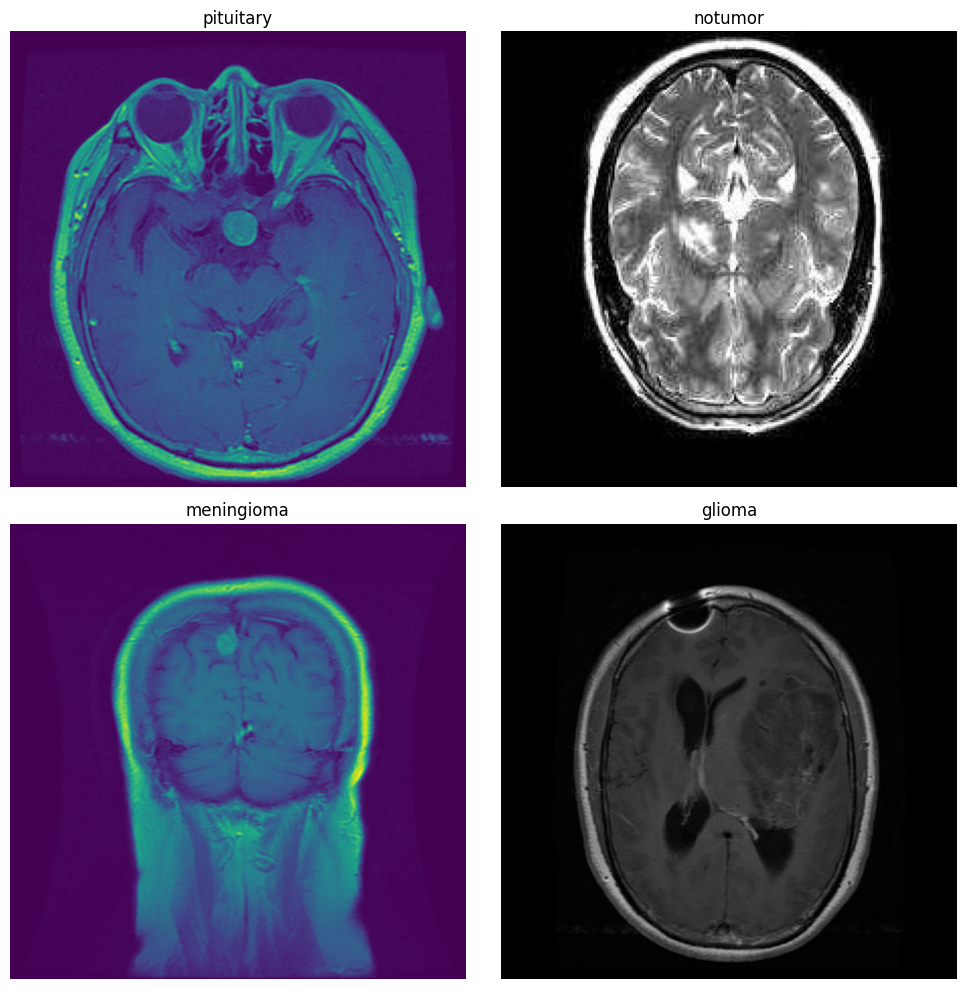

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
for i,class_name in enumerate(classes):
    class_path = os.path.join(train_path,class_name)
    image_path = os.path.join(class_path,os.listdir(class_path)[5])

    img = Image.open(image_path)

    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras import layers,models


IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [17]:
normal_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x,y : (normal_layer(x),y))
val_ds = val_ds.map(lambda x,y : (normal_layer(x),y))

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
EPOCHS = 4

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 752s 4s/step - accuracy: 0.6617 - loss: 0.8166 - val_accuracy: 0.8528 - val_loss: 0.3726
Epoch 2/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.8888 - loss: 0.3070 - val_accuracy: 0.9130 - val_loss: 0.2402
Epoch 3/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 731s 4s/step - accuracy: 0.9528 - loss: 0.1424 - val_accuracy: 0.9176 - val_loss: 0.2214
Epoch 4/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 721s 4s/step - accuracy: 0.9719 - loss: 0.0831 - val_accuracy: 0.9466 - val_loss: 0.1496


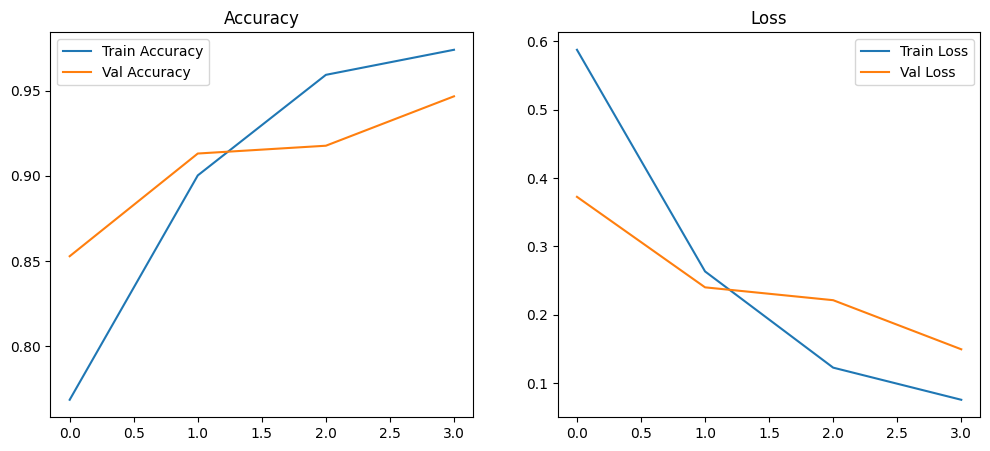

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()
